<h1 align=center><font size = 5>Market strategy of an online food-delivery company in the cities of New York and Toronto</font></h1>

# Final Report

## 0. The changing market for food delivery

The business of delivering restaurants meals to the home is undergoing rapid change as new online platforms race to capture markets and customers across over the world.

Worldwide, the market for food delivery stands at €83 billion, or 1 % of the total food market, and has already matured in most countries, with an overall annual growth rate estimated at just 3.5 % for the next five years.

**The food-delivery market has the potential for robust growth**   
Total addressable classic food-delivery market, %

<img src='ny_t_ima1.jpg'>

By far, the most common form of delivery is the traditional model. However, as in so many other sectors, the rise of digital technology is reshaping the market.

The opportunity for new online-delivery is to extend food delivery to a new group of restaurants and customers, especially in cities like New York and Toronto. So stakeholders of our company wants to know more information about neighbourhoods in this cities.

## 1. Business problem

Our online-delivery company wants to put into market for the next years, new services and products in the cities of New York and Toronto.
The company needs to plan and prior where to begin, in New York or Toronto. The strategy in the first stage is to study both cities.
So the company has decided to analyze and determine some parameters of this cities, in order to take a decision.
This market study must analyze neighbourhoods, total number, geolocation, density, and so on.

This information will let stakeholders of our company to know more about necessary resources, and also will let to take the right decision.

## 2. Data

At initial stage the company doesn't have any kind of information so an exploratory study is needed. The main source consulted is the web.

## 2.1. New York

Neighborhood in New York City has a total of 5 boroughs and 306 neighborhoods. In order to segment the neighborhoods and explore them, its needed a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and longitude coordinates of each neighborhood. 

We get the dataset from this web link in Geojson format: https://geo.nyu.edu/catalog/nyu_2451_34572

The file name is: nyu-2451-34572-geojson.json

<img src='ny_neigh_ima.jpg'>

## 2.2. Toronto

Toronto city has 289 neighbourhoods, so is similar to New York.

We get the dataset from Wikipedia at this web link: (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)

<img src='t_neigh_ima.jpg'>

# 3. Methodology

## 3.1. The platform

The platform used to get data information is Anaconda environment, using Python programming language in Jupiter Notebook interface. In this project, working with the Foursquare API explores neighborhoods similarity between New York City and Toronto. Using k-means clustering algorithm to group each neighbourhood. Finally, using the Folium library to visualize the neighborhoods in New York City and Toronto and their emerging clusters, and also comparing parameters as total number of neighbourhoods, density and so on.

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

## 3.2. Download, Explore Dataset and Data Analysis

### 3.2.1. New York Dataset

#### 3.2.1.1. Load and explore the data

Next, let's load the data.

In [4]:
with open('nyu-2451-34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.

In [5]:
# newyork_data

All the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [6]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.

In [7]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [8]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [9]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [10]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [11]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

#### 3.2.1.2. Analyze neighborhoods

#### Use geocoder library to get the latitude and longitude values of New York City.

In [14]:
address = 'New York City, NY'

lat_lng_coords = None

while(lat_lng_coords is None):
    g = geocoder.google(address)
    lat_lng_coords = g.latlng

latitude=lat_lng_coords[0]
longitude=lat_lng_coords[1]

#geolocator = Nominatim()
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127753, -74.0059728.


#### Create a map of New York with neighborhoods superimposed on top.

In [15]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_newyork)
        #parse_html=False)  
    
map_newyork

#### 3.2.1.3. Cluster Neighborhoods

Cluster Neighbourhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [17]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters_ny = 5

newyork_grouped_clustering = neighborhoods.drop(['Borough','Neighborhood'], axis=1)

# run k-means clustering
kmeans_ny = KMeans(n_clusters=kclusters_ny, random_state=0).fit(newyork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10]
kmeans_ny.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2,
       3, 3, 0, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 4, 2, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0,
       0, 0, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1,
       1, 1, 3, 3, 0, 1, 1, 1, 4, 3, 3, 4, 4, 4, 3,

Visualize the resulting clusters

In [18]:
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex

# create map
map_clusters_ny = folium.Map(location=[40.7, -74.0], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters_ny)
ys = [i+x+(i*x)**2 for i in range(kclusters_ny)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(newyork_grouped_clustering['Latitude'], newyork_grouped_clustering['Longitude'], kmeans_ny.labels_):
#for lat, lon, cluster in zip(toronto_grouped_clustering['Latitude'], toronto_grouped_clustering['Longitude'], toronto_grouped_clustering['Cluster Labels']):
    label = folium.Popup(
        ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_ny)
       
map_clusters_ny

### 3.2.2. Toronto Dataset

#### 3.2.2.1. Load and explore the data

Import library to import data from web

In [19]:
import requests

In [20]:
wikipedia_link='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [21]:
raw_wikipedia_page = requests.get(wikipedia_link)

In [22]:
page = raw_wikipedia_page.text
#print(page)

Extracting Information looking structure pattern

In [23]:
def findContent(node, page):
    startIndex = page.find("<"+node+">")
    endIndex = page.find("</"+node+">")
    info = page[startIndex+len("<"+ node+">"):endIndex]
    return info

info = findContent("tbody", page)
#print(info)

In [24]:
def findContent(node, page):
    startIndex = page.find("<"+node+">")
    endIndex = page.find("</"+node+">")
    title = page[startIndex+len("<"+ node+">"):endIndex]
    return title

def findContent2(node, page):
    startIndex = page.find(node)
    endIndex = page.find("</a"+node)
    title = page[startIndex+len(node):endIndex]
    return title

# separate info in lines
data=info.split('\n')
l=len(data)
#print(l)

# Create list for postalcode, borough and neighbourhood
# This is an alternative to Beautiful package

postalcode=[]
borough=[]
neighbourhood=[]
# search info
for i in range(6,l,5):
    # search borough
    t1=findContent("td", data[i+1])
    if t1!="Not assigned":
        t2=findContent2(">",t1)
        borough.append(t2)
        #print("borough:",t2)
        # search postalcode
        postalcode.append(findContent("td", data[i]))
        # search neighbourhood
        if data[i+2][4:]!="Not assigned":
            t3=findContent2(">",data[i+2][4:])
            neighbourhood.append(t3)
            #print("neigh:",t3)
        else:
            if t1!="Not assigned":
                neighbourhood.append(t2)
                #print("neigh2:",t2)
            else:
                neighbourhood.append(data[i+2][4:])
                #print("neigh2:",data[i+2][4:])

In [25]:
# Create dataframe
import pandas as pd
d = {'PostalCode': postalcode, 'Borough': borough, 'Neighbourhood': neighbourhood}
df = pd.DataFrame(data=d)
df

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Queen's Park
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


Number of rows of Dataframe

In [26]:
df.shape

(212, 3)

#### 3.2.2.2. Explore neighbourhoods in Toronto

Extracting Geographic Information (longitude and latitude)

In [27]:
import geocoder

# initialize latitude and longitude variables
llat=[]
llon=[]

n=212

for j in range(0,n,1):
    print("j:",j)
    # initialize your variable to None
    lat_lng_coords = None
    
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postalcode[j]))
        lat_lng_coords = g.latlng

    llat.append(lat_lng_coords[0])
    llon.append(lat_lng_coords[1])

j: 0
j: 1
j: 2
j: 3
j: 4
j: 5
j: 6
j: 7
j: 8
j: 9
j: 10
j: 11
j: 12
j: 13
j: 14
j: 15
j: 16
j: 17
j: 18
j: 19
j: 20
j: 21
j: 22
j: 23
j: 24
j: 25
j: 26
j: 27
j: 28
j: 29
j: 30
j: 31
j: 32
j: 33
j: 34
j: 35
j: 36
j: 37
j: 38
j: 39
j: 40
j: 41
j: 42
j: 43
j: 44
j: 45
j: 46
j: 47
j: 48
j: 49
j: 50
j: 51
j: 52
j: 53
j: 54
j: 55
j: 56
j: 57
j: 58
j: 59
j: 60
j: 61
j: 62
j: 63
j: 64
j: 65
j: 66
j: 67
j: 68
j: 69
j: 70
j: 71
j: 72
j: 73
j: 74
j: 75
j: 76
j: 77
j: 78
j: 79
j: 80
j: 81
j: 82
j: 83
j: 84
j: 85
j: 86
j: 87
j: 88
j: 89
j: 90
j: 91
j: 92
j: 93
j: 94
j: 95
j: 96
j: 97
j: 98
j: 99
j: 100
j: 101
j: 102
j: 103
j: 104
j: 105
j: 106
j: 107
j: 108
j: 109
j: 110
j: 111
j: 112
j: 113
j: 114
j: 115
j: 116
j: 117
j: 118
j: 119
j: 120
j: 121
j: 122
j: 123
j: 124
j: 125
j: 126
j: 127
j: 128
j: 129
j: 130
j: 131
j: 132
j: 133
j: 134
j: 135
j: 136
j: 137
j: 138
j: 139
j: 140
j: 141
j: 142
j: 143
j: 144
j: 145
j: 146
j: 147
j: 148
j: 149
j: 150
j: 151
j: 152
j: 153
j: 154
j: 155
j: 156
j: 157
j: 1

In [28]:
# Create new dataframe
# import pandas as pd
d1 = {'PostalCode': postalcode, 'Borough': borough, 'Neighbourhood': neighbourhood, 'Latitude': llat, 'Longitude': llon}
df2 = pd.DataFrame(data=d1)
df2

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
4,M6A,North York,Lawrence Heights,43.718518,-79.464763
5,M6A,North York,Lawrence Manor,43.718518,-79.464763
6,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
7,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
8,M1B,Scarborough,Rouge,43.806686,-79.194353
9,M1B,Scarborough,Malvern,43.806686,-79.194353


#### 3.2.2.3. Analyze neighbourhood

Create a Map of Toronto using Folium library

In [29]:
!pip install folium
import folium

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [30]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[43.7, -79.3], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df2['Latitude'], df2['Longitude'], df2['Borough'], df2['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)
        #parse_html=False)  
    
#map_toronto

<img src='ima1.jpg'>

#### 3.2.2.4. Clustering Neighbourhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [31]:
from sklearn.cluster import KMeans


# set number of clusters
kclusters_to = 5

toronto_grouped_clustering = df2.drop(['PostalCode','Borough','Neighbourhood'], axis=1)

# run k-means clustering
kmeans_to = KMeans(n_clusters=kclusters_to, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10]
kmeans_to.labels_

array([0, 2, 4, 4, 3, 3, 4, 1, 2, 2, 0, 2, 2, 4, 4, 0, 1, 1, 1, 1, 1, 2,
       2, 2, 0, 0, 4, 4, 4, 1, 1, 1, 1, 2, 2, 2, 2, 4, 4, 2, 0, 4, 4, 2,
       0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 2, 0, 0, 0, 3, 3, 4, 4, 4, 4, 4, 4,
       2, 2, 2, 0, 3, 3, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 0, 0, 3, 4, 4, 4,
       4, 3, 3, 3, 3, 2, 2, 2, 0, 0, 3, 4, 0, 0, 3, 3, 3, 3, 3, 3, 2, 2,
       0, 3, 0, 0, 1, 1, 3, 2, 2, 2, 0, 0, 4, 4, 1, 1, 3, 2, 2, 0, 0, 4,
       4, 4, 1, 1, 1, 3, 3, 3, 3, 2, 0, 4, 4, 1, 1, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 4, 4, 1, 1, 3, 2, 4, 4, 4, 4, 1, 1, 1, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Visualize the resulting clusters

In [33]:
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex

# create map
map_clusters_to = folium.Map(location=[43.7, -79.3], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters_to)
ys = [i+x+(i*x)**2 for i in range(kclusters_to)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(toronto_grouped_clustering['Latitude'], toronto_grouped_clustering['Longitude'], kmeans_to.labels_):
#for lat, lon, cluster in zip(toronto_grouped_clustering['Latitude'], toronto_grouped_clustering['Longitude'], toronto_grouped_clustering['Cluster Labels']):
    label = folium.Popup(
        ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_to)
       
#map_clusters_to

<img src='ima2.jpg'>

## 4. Results

In this section, with clusters registered for New York and Toronto cities, some metrics are computed. 
This metrics are:
- Number of clusters
- Number of neighbourhoods
- Silhouette Coefficient

### 4.1. Number of clusters

In [45]:
print("New York clusters: ",kclusters_ny)
print("Toronto clusters: ",kclusters_to)

New York clusters:  5
Toronto clusters:  5


### 4.2. Number of neighbourhoods

In [46]:
print("New York neighbourhoods: ",neighborhoods.count().max())
print("Toronto neighbourhoods: ",df2.count().max())

New York neighbourhoods:  306
Toronto neighbourhoods:  212


### 4.3. Silhouette Coefficient

Reference: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score
print("New York Silhouette Coefficient: ",silhouette_score(newyork_grouped_clustering, kmeans_ny.labels_))
print("Toronto Silhouette Coefficient: ",silhouette_score(toronto_grouped_clustering, kmeans_to.labels_))

New York Silhouette Coefficient:  0.46848909976045605
Toronto Silhouette Coefficient:  0.4304431608417664


Automatically created module for IPython interactive environment
For n_clusters = 5 The average silhouette_score in New York is : 0.4702263718223891
For n_clusters = 5 The average silhouette_score in Toronto is : 0.44428339238751674


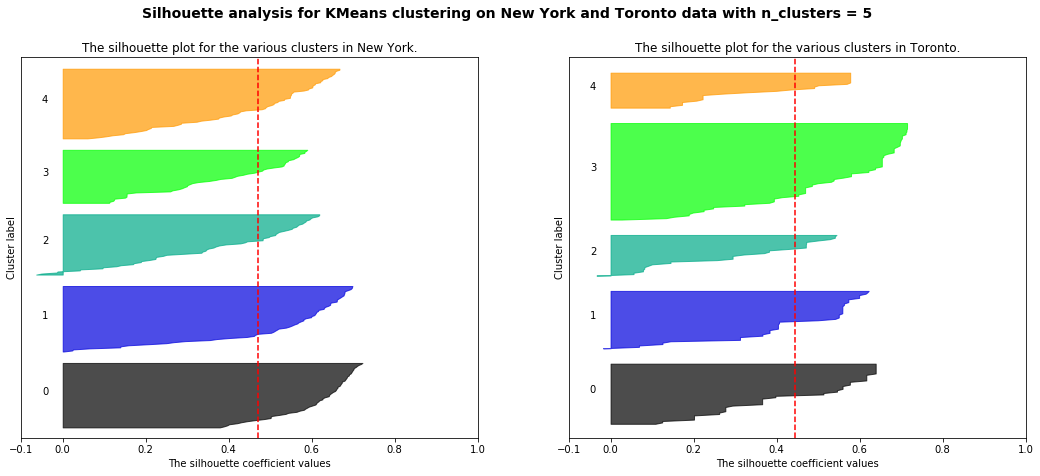

In [60]:
from __future__ import print_function

from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X_ny=newyork_grouped_clustering
y_ny=kmeans_ny.labels_
X_to=toronto_grouped_clustering
y_to=kmeans_to.labels_

range_n_clusters = [5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    ax2.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_ny) + (n_clusters + 1) * 10])
    ax2.set_ylim([0, len(X_to) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer_ny = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_ny = clusterer.fit_predict(X_ny)
    clusterer_to = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_to = clusterer.fit_predict(X_to)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters   
    silhouette_avg_ny = silhouette_score(X_ny, cluster_labels_ny)
    silhouette_avg_to = silhouette_score(X_to, cluster_labels_to)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score in New York is :", silhouette_avg_ny)

    print("For n_clusters =", n_clusters,
          "The average silhouette_score in Toronto is :", silhouette_avg_to)

    # Compute the silhouette scores for each sample
    sample_silhouette_values_ny = silhouette_samples(X_ny, cluster_labels_ny)
    sample_silhouette_values_to = silhouette_samples(X_to, cluster_labels_to)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values_ny = \
            sample_silhouette_values_ny[cluster_labels_ny == i]

        ith_cluster_silhouette_values_ny.sort()

        size_cluster_i_ny = ith_cluster_silhouette_values_ny.shape[0]
        y_upper = y_lower + size_cluster_i_ny

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values_ny,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i_ny, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters in New York.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_ny, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values_to = \
            sample_silhouette_values_to[cluster_labels_to == i]

        ith_cluster_silhouette_values_to.sort()

        size_cluster_i_to = ith_cluster_silhouette_values_to.shape[0]
        y_upper = y_lower + size_cluster_i_to

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax2.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values_to,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i_to, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax2.set_title("The silhouette plot for the various clusters in Toronto.")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax2.axvline(x=silhouette_avg_to, color="red", linestyle="--")

    ax2.set_yticks([])  # Clear the yaxis labels / ticks
    ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on New York and Toronto data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## 5. Discussion

Our company needs to plan and prior where to begin, in New York or Toronto. In order to take a decision, some metrics were computed and presented in previous section.
The results show that both cities, with the same number of clusters, has similar Silhouette Coefficient. Therefore, New York has more neighbourhoods than Toronto.

## 6. Conclusion

Although, both cities are similar in shape, clusters and silhouette coefficient, the strategy of our company in the first stage will focus in New York cities, were more people and posibilities there are. So stakeholders must focus resources in this city.